In [2]:
import pandas as pd
import sqlite3 as sql # included as part of python standard library
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

In [3]:
# creating connection
conn  = sql.connect("Db-IMDB.db")

In [4]:
# Get list of all tables in the DB.
result = pd.read_sql_query("SELECT tbl_name FROM sqlite_master where type = 'table';", conn)
print(result)

      tbl_name
0        Movie
1        Genre
2     Language
3      Country
4     Location
5   M_Location
6    M_Country
7   M_Language
8      M_Genre
9       Person
10  M_Producer
11  M_Director
12      M_Cast


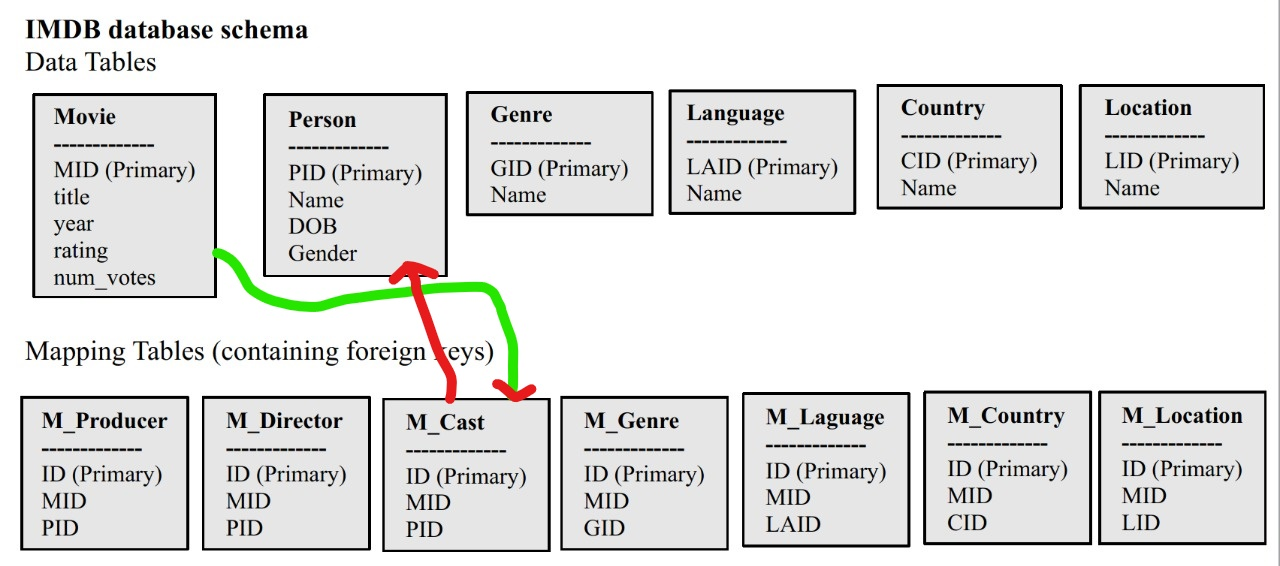

In [6]:
Image("img/ans_5_a.jpg",width=1200, height=300)

### Question 5:- a. --::-- For each year, count the number of movies in that year that had only female actors.

### PART-1 :: Let first create the table for all male actors.

In [4]:
part_1 = pd.read_sql_query("""

SELECT mc.MID FROM M_Cast mc INNER JOIN Person p ON TRIM(p.PID) = TRIM(mc.PID) WHERE p.Gender ='Male';

""", conn)

In [5]:
part_1

,MID
0,tt2388771
1,tt2388771
2,tt2388771
3,tt2388771
4,tt2388771
...,...
58304,tt0375890
58305,tt0375890
58306,tt0375890
58307,tt0375890


### PART-2 :- :: Now we select those actors which doesn't come in part-1 result, so by this we get only Female actors.

In [21]:
part_2 = pd.read_sql_query("""

SELECT CAST(SUBSTR(m.year,-4) AS UNSIGNED) YEAR, COUNT(DISTINCT TRIM(MID)) Movies_Done_By_Female_Lead FROM Movie m \
WHERE TRIM(m.MID) NOT IN (SELECT DISTINCT TRIM(mc.MID) FROM M_Cast mc INNER JOIN Person p \
ON TRIM(p.PID) = TRIM(mc.PID) WHERE TRIM(p.Gender) ='Male') \
GROUP BY CAST(SUBSTR(M.year,-4) AS UNSIGNED) ORDER BY m.year ASC; 

""", conn)

In [22]:
part_2

,YEAR,Movies_Done_By_Female_Lead
0,1939,1
1,1999,1
2,2000,1
3,2009,1
4,2012,1
5,2018,2


### Now let it try this particular question using 'WITH' query.

In [23]:
ans_4 = pd.read_sql_query("""

WITH MOVIES_WITH_MALE_ACTOR AS
(
SELECT DISTINCT TRIM(mc.MID) FROM M_Cast mc INNER JOIN Person p \
ON TRIM(p.PID) = TRIM(mc.PID) WHERE TRIM(p.Gender) ='Male'
)

SELECT CAST(SUBSTR(m.year,-4) AS UNSIGNED) YEAR, COUNT(DISTINCT TRIM(MID)) Movies_Done_By_Female_Lead FROM Movie m \
WHERE TRIM(m.MID) NOT IN MOVIES_WITH_MALE_ACTOR GROUP BY CAST(SUBSTR(M.year,-4) AS UNSIGNED) ORDER BY m.year ASC;

""", conn)

In [24]:
ans_4

,YEAR,Movies_Done_By_Female_Lead
0,1939,1
1,1999,1
2,2000,1
3,2009,1
4,2012,1
5,2018,2
